# 0. 安装必要的库，这里已经显示安装好

In [1]:
# !pip install NJmatML
# !pip install matplotlib
# !pip install sklearn
# !pip install scikit-learn
# !pip install pandas 
# !pip install gplearn 
# !pip install imblearn 
# !pip install numpy
# !pip install seaborn
# !pip install xgboost
# !pip install rdkit
# !pip install padelpy
# !pip install pymatgen
# !pip install matminer
from NJmatML import dataML 
import warnings
warnings.filterwarnings("ignore")

# 1. file_name打开的文件名可视化pandas数据
#### data是csv倒入时的数据集
#### data_rfe在后面会有，是rfe特征选择后的总数据集
#### t是rfe特征选择后的特征数据
#### target是rfe特征选择后的目标数据

     A1 NumberofProtons  A2 NumberofProtons  B NumberofProtons  \
0                     3                   3                 32   
1                    11                  11                 32   
2                    19                  19                 32   
3                    37                  37                 32   
4                    55                  55                 32   
..                  ...                 ...                ...   
300                  19                  19                 29   
301                  19                  19                 26   
302                  19                  19                 12   
303                  19                  19                 25   
304                  19                  19                 28   

     X1 NumberofProtons  X2 NumberofProtons  X3 NumberofProtons  \
0                     9                   9                   9   
1                     9                   9                   9   
2     

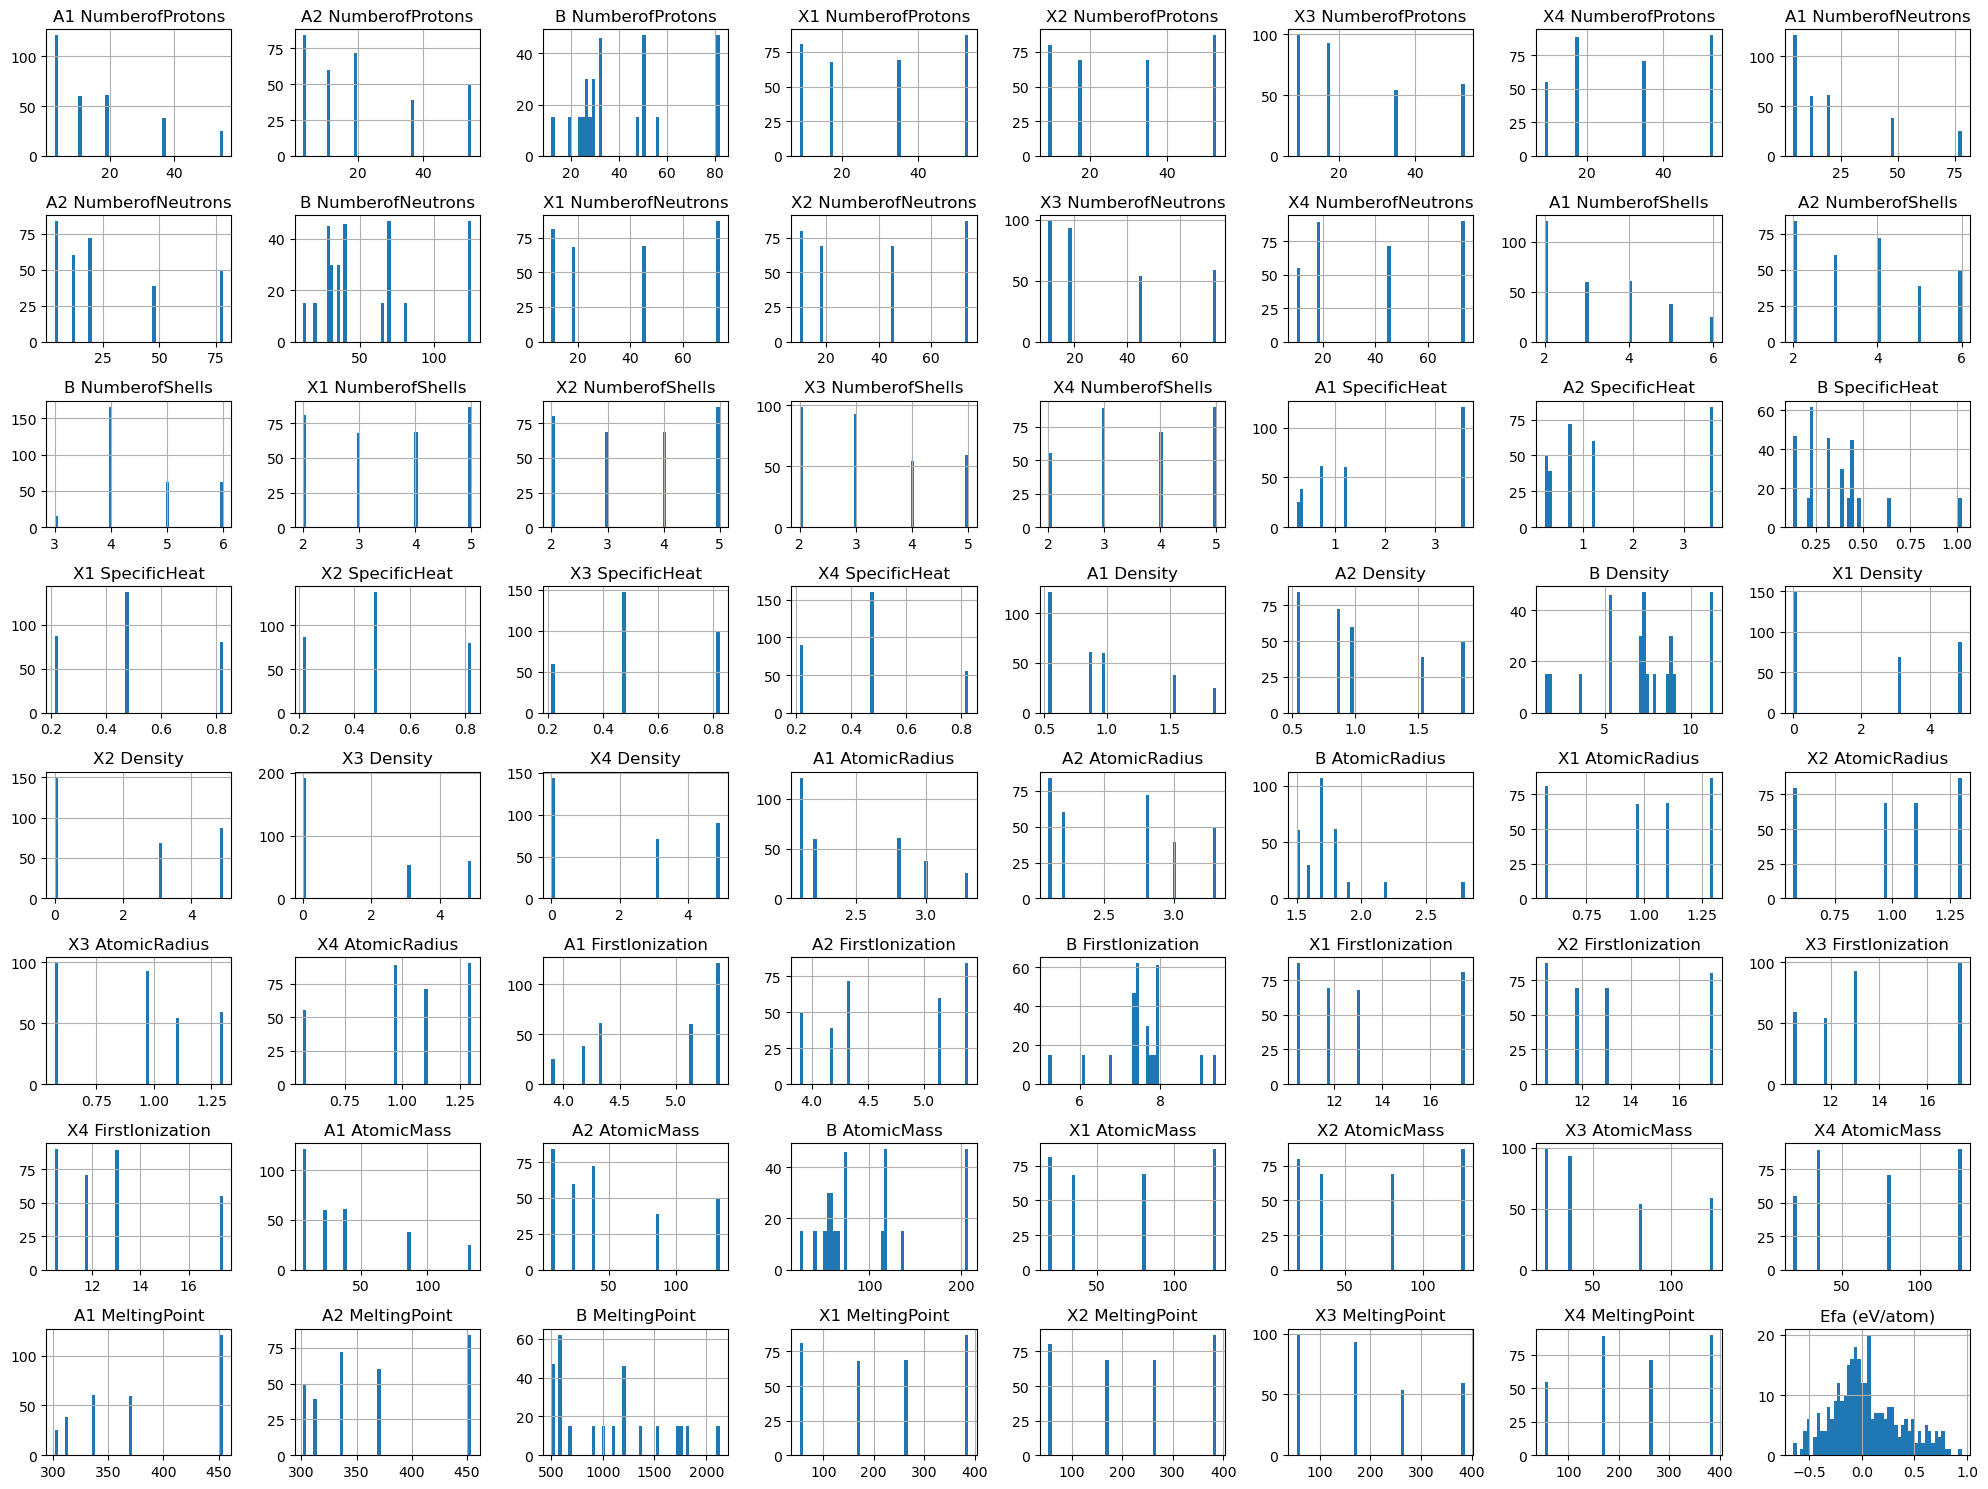

In [2]:
dataML.file_name('2DEformationCleaned.csv') #打开csv并存到data中
dataML.hist()  #画所有列分布的柱状图，例如potential 在0.3 V最多

# 2. 封装函数特征选择之前heatmap画热图

In [ ]:
dataML.heatmap_before() #画特征选择之前的总heatmap热图

# 3. rfe特征选择

In [3]:
dataML.feature_rfe_select1(23)   #23为希望最后剩余的特征数目，可以自行改变

特征是否被选中：
 [False  True  True False False False False False  True False False  True
 False  True False False False False  True False  True False  True False
 False  True False False  True  True  True False False False False False
 False  True False  True False False  True  True  True False  True False
  True False  True False False False False False False  True  True False
 False  True False]
获取的数据特征尺寸: (305, 23)
最后的特征s_rfe: ['A2 NumberofProtons' 'B NumberofProtons' 'A2 NumberofNeutrons'
 'X2 NumberofNeutrons' 'X4 NumberofNeutrons' 'X2 NumberofShells'
 'X4 NumberofShells' 'A2 SpecificHeat' 'X2 SpecificHeat' 'A1 Density'
 'A2 Density' 'B Density' 'B AtomicRadius' 'X2 AtomicRadius'
 'A1 FirstIonization' 'A2 FirstIonization' 'B FirstIonization'
 'X2 FirstIonization' 'X4 FirstIonization' 'A2 AtomicMass'
 'A2 MeltingPoint' 'B MeltingPoint' 'X3 MeltingPoint']
目标target:      Efa (eV/atom)
0         0.817268
1         0.468555
2         0.457779
3         0.305243
4         0.080708
..         

# 4 画rfe特征选择后的热图和pairplot图
## 4.1 画rfe特征选择后的热图

In [ ]:
dataML.heatmap_afterRFE() 

In [ ]:
dataML.pairplot_afterRFE()#这里画图需要3分钟左右

这个图可以提取科学信息

特征与输出是正相关还是负相关

# 5 重要性排名（皮尔逊系数）
## 5.1 特征选择之前所有特征的重要性

In [ ]:
dataML.FeatureImportance_before(80,8,10,4)  #rotation=80, fontsize=8, figure_size_xaxis=10,figure_size_yaxis=4

这个图可以提取科学信息：

正相关，负相关，为什么正相关，为什么负相关

重要性排名前几名解释，哪些相关，哪些不相关，为什么相关，为什么不相关

## 5.2 特征选择之后的个别特征的重要性

In [ ]:
dataML.FeatureImportance_afterRFE(80,12,5,4) #rotation=80, fontsize=12, figure_size_xaxis=5,figure_size_yaxis=4

这个图可以快速提取科学信息：

正相关，负相关，为什么正相关，为什么负相关

重要性排名前几名解释，哪些相关，哪些不相关，为什么相关，为什么不相关

# 6 机器学习建模
## 6.1 xgboost建模和准确率画图
### 6.1.1 xgboost默认超参数建模画图
#### (n_estimators=2000, max_depth=100, eta=0.1, gamma=0,
#### subsample=0.9, colsample_bytree=0.9, learning_rate=0.2)

RMSE: 0.17521613213262427
MAE: 0.10917213080590547
R2: 0.6732830940963825
MSE: 0.03070069295951725


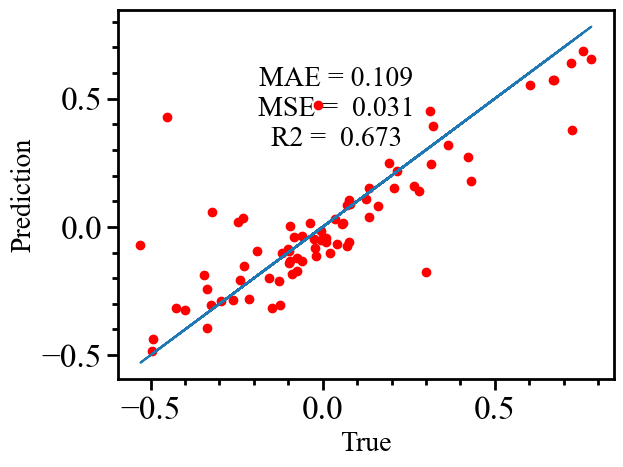

scores: [0.43694791 0.51333134 0.48556184 0.65028648 0.46479647 0.82090331
 0.92260921 0.73226461 0.83398062 0.56199025]
1 scores_mean: 0.4369479099696235
2 scores_mean: 0.475139623923704
3 scores_mean: 0.4786136961395733
4 scores_mean: 0.5215318927461423
5 scores_mean: 0.5101848091389567
6 scores_mean: 0.5619712255888826
7 scores_mean: 0.6134909371421501
8 scores_mean: 0.6283376461904014
9 scores_mean: 0.6511868653320895
10 scores_mean: 0.6422672035214194


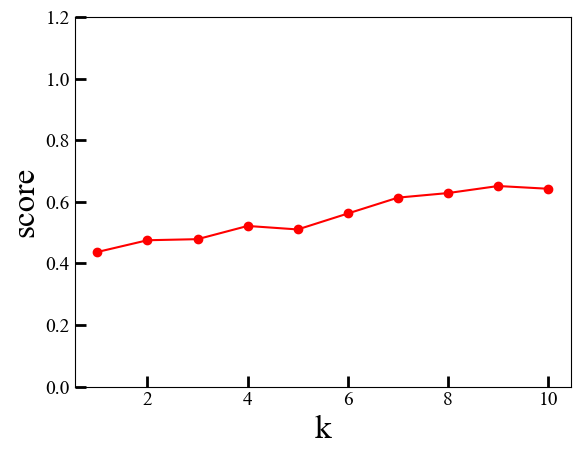

RMSE: 0.000827190500237884
MAE: 0.000621577159613102
R2: 0.9999935688758871
MSE: 6.842441236838008e-07


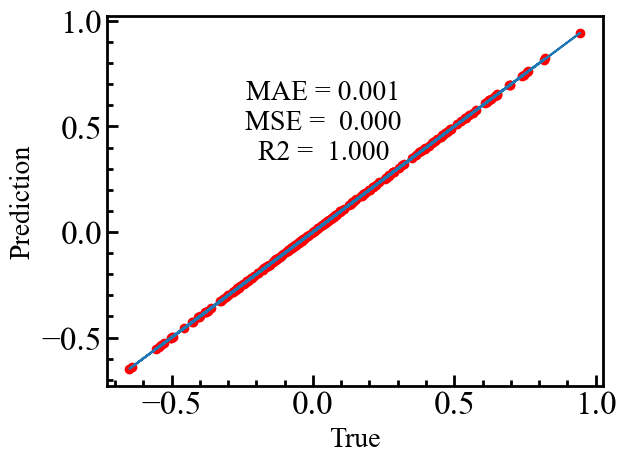

In [4]:
dataML.xgboost_default() #三个图，第一个图测试集拟合，第二个图交叉验证，第三个图训练集的拟合（没什么用）

### 6.1.2 xgboost自己修改超参数, 建模
画图得到拟合图以及交叉验证图
(n_estimators=2000xxx, max_depth=100xxx, eta=0.1xxx, gamma=0xxx,
subsample=0.9xxx, colsample_bytree=0.9xxx, learning_rate=0.2xxx)

RMSE: 0.16636975050571787
MAE: 0.1067242737401203
R2: 0.7054410928013166
MSE: 0.02767889388333481


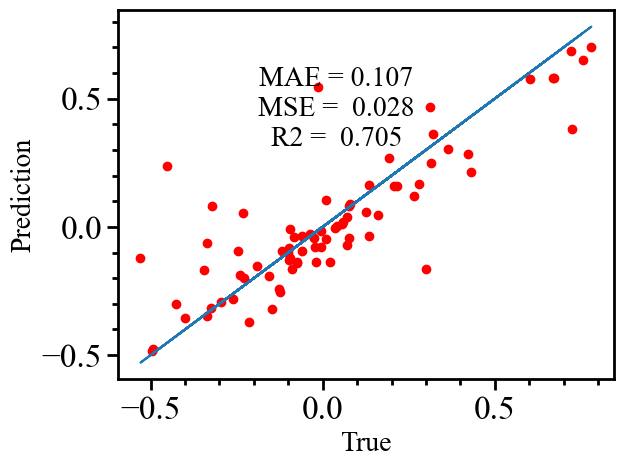

scores: [0.47030644 0.38242807 0.58266441 0.58511908 0.46437475 0.87463376
 0.90598032 0.74746514 0.77348304 0.61707434]
1 scores_mean: 0.47030644224032425
2 scores_mean: 0.42636725551938115
3 scores_mean: 0.4784663078252433
4 scores_mean: 0.5051295002049354
5 scores_mean: 0.49697855110903655
6 scores_mean: 0.5599210853094404
7 scores_mean: 0.6093581183129222
8 scores_mean: 0.626621496567417
9 scores_mean: 0.6429394461469274
10 scores_mean: 0.6403529350496153


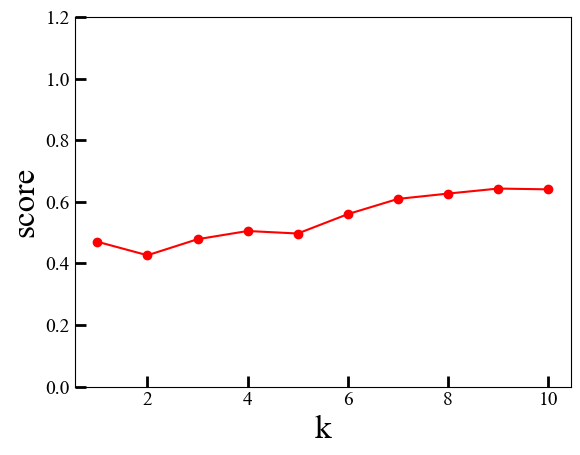

RMSE: 0.000845743596389224
MAE: 0.0006333886095894151
R2: 0.9999932771526374
MSE: 7.152822308333786e-07


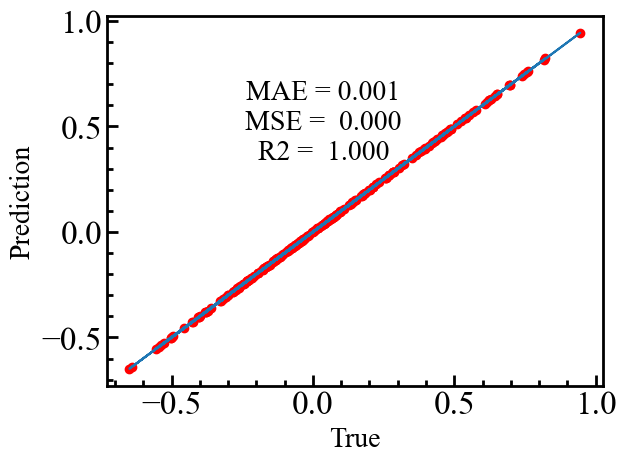

In [4]:
dataML.xgboost_modify(2000,200,0.2,0,0.9,0.8,0.2) #三个图，第一个图测试集拟合，第二个图交叉验证，第三个图训练集的拟合（没什么用）

#(n_estimators=1000, max_depth=200, eta=0.2, gamma=0, subsample=0.9, colsample_bytree=0.8, learning_rate=0.2)
#这里可以自己更改超参数，play with it, 观察准确率是否提升

第一个拟合图是基于测试集。
RMSE: 0.055163274701856106
MAE: 0.03133570165011043
R2: 0.8083609244543635
MSE: 0.0030429868758324375
上述为误差，相比于真实目标数值还行。
r2越大越好，这里也还行

第二个交叉验证图为10折交叉验证，准确率为不同k的准确率，大致看到大部分score接近1，平均score>0.8甚至>0.9, 因此10折交叉验证准确率还行。这里的score是R2。

### 6.1.3 xgboostRandomSearchCV随机超参数, 建模并观察准确率

RMSE: 0.17909124038710664
MAE: 0.11972417235229055
R2: 0.6586718411898331
MSE: 0.03207367238339242


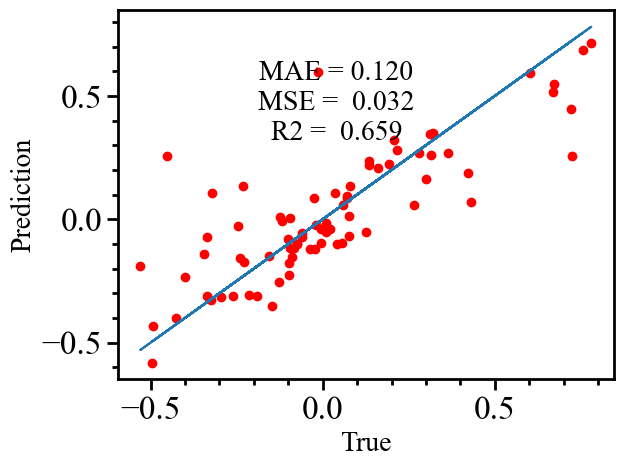

scores: [0.151897   0.70146107 0.63305246 0.58107084 0.52191297 0.77524989
 0.92627965 0.85474453 0.67377817 0.56014488]
1 scores_mean: 0.15189700198152556
2 scores_mean: 0.42667903584513145
3 scores_mean: 0.4954701775827364
4 scores_mean: 0.5168703441360842
5 scores_mean: 0.5178788686819007
6 scores_mean: 0.5607740393703774
7 scores_mean: 0.6129891270040614
8 scores_mean: 0.6432085523289607
9 scores_mean: 0.6466051768200582
10 scores_mean: 0.6379591475820837


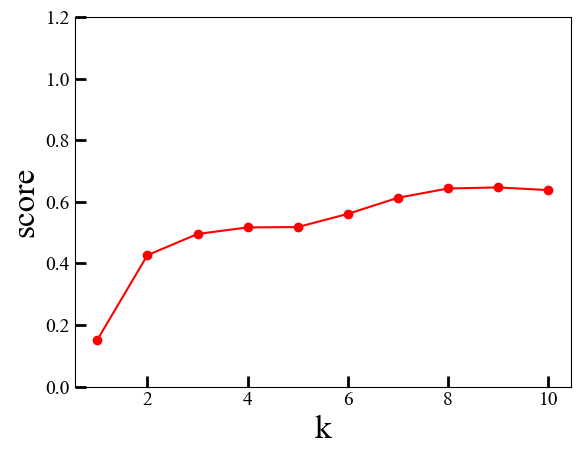

NotFittedError: need to call fit or load_model beforehand

In [5]:
dataML.xgboost_RandomSearchCV() 

#比较慢，尤其是交叉验证，请耐心等待，默认：
#         'n_estimators': range(80, 200, 4),
#         'max_depth': range(2, 15, 1),
#         'learning_rate': np.linspace(0.01, 2, 4),
#         'subsample': np.linspace(0.7, 0.9, 4),
#         'colsample_bytree': np.linspace(0.5, 0.98, 4),
#         'min_child_weight': range(1, 9, 2)

### 6.1.4 xgboost SearchCV网格搜索（并非随机）寻找最优超参数, 建模并观察准确率

In [ ]:
# dataML.xgboost_GridSearchCV() #非常慢，请耐心等待


#  这里暂时设置的参数如下，后面更能需要更新
#     param_distribs = {
#         'n_estimators': range(80, 200, 30),
#         'max_depth': range(2, 15, 3),
#         'learning_rate': np.linspace(0.01, 2, 4),
#         'subsample': np.linspace(0.7, 0.9, 4),
#         'colsample_bytree': np.linspace(0.5, 0.98, 4),
#         'min_child_weight': range(1, 9, 3)
#     }

## 6.2 Random forest 随机森林建模画图
### 6.2.1 Random forest 默认超参数建模画图

In [ ]:
dataML.RandomForest_default() #三个图，第一个图测试集拟合，第二个图交叉验证，第三个图训练集的拟合

### 6.2.2 Random forest 自己修改超参数建模画图

In [ ]:
dataML.RandomForest_modify(20, 0.3, 2, 10, 10) # max_depth=20, max_features=0.3, min_samples_split=2, n_estimators=10, random_state=10 可以自己修改

### 6.2.3 Random forest RandomSearchCV 随机搜索超参数建模画图
param_distribs = {'bootstrap': [True, False],
           'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 200, None],
           'max_features': ['auto', 'sqrt'],
           'min_samples_leaf': [1, 2, 4],
           'min_samples_split': [2, 5, 10],
           'n_estimators': [130, 180, 230]}
           
RandomizedSearchCV(clf, param_distribs, n_iter=300, cv=10, scoring='neg_mean_squared_error')

In [ ]:
# dataML.RandomForest_RandomSearchCV()  #需要很长时间

## 6.3  Bagging建模画图
### 6.3.1  Bagging 默认建模画图

In [ ]:
dataML.Bagging_default()

## 6.4  AdaBoost建模画图
### 6.4.1  AdaBoost默认建模画图

In [ ]:
dataML.AdaBoost_default()

## 6.5  GradientBoosting建模画图
### 6.5.1  GradientBoosting默认建模画图

In [ ]:
dataML.GradientBoosting_default()

## 6.6 ExtraTree建模画图
### 6.6.1 ExtraTree默认建模画图

In [ ]:
dataML.ExtraTree_default()

## 6.7 svm建模画图
### 6.7.1 svm默认建模画图

In [ ]:
dataML.svm_default()

## 6.8 DecisionTree建模画图
### 6.8.1 DecisionTree默认建模画图

In [ ]:
dataML.DecisionTree_default()

## 6.9 LinearRegression建模画图
### 6.9.1 LinearRegression默认建模画图

In [ ]:
dataML.LinearRegression_default()

In [ ]:
## 6.10 Ridge建模画图
### 6.10.1 Ridge默认建模画图

In [ ]:
dataML.Ridge_default()

## 6.11 MLP建模画图
### 6.11.1 MLP默认建模画图

In [ ]:
dataML.MLP_default()

### 6.11.2 MLP_modify手动修改超参数建模画图

In [ ]:
dataML.MLP_modify(0.01,0.0001,200000,200,200)
# #   MLPRegressor(solver='lbfgs', activation='relu', learning_rate_init=0.01, alpha=0.0001, max_iter=200000, hidden_layer_sizes=(200, 200))

比较上述算法，选取最准确的机器学习模型

# 7. 简单的预测集建立

## 7.1 基于xgboost_default预测

In [ ]:
dataML.xgboost_default_predict('x_New.csv') #仍为以前的参数，x_New.csv为新的需要预测数据集（不包含output）
# xgboost_default

这里基于xgboost_defaul生成了新的预测数据集New_prediction_total_xgboost_default.csv，最右边一列为output，需要去实验验证或DFT模拟验证！

## 7.2 基于xgboost_modify预测

In [ ]:
dataML.xgboost_modify_predict(1000,200,0.2,0,0.9,0.8,0.2,'x_New.csv') #仍为以前的参数，x_New.csv为新的需要预测数据集（不包含output）
# xgboost_modify

这里生成了新的预测数据集New_prediction_total_xgboost_modify.csv，最右边一列为output，需要去实验验证或DFT模拟验证！

# 8 描述符导入 
## 8.1 有机分子描述符导入（NJmatML提供了pydel描述符和rdkit描述符）
### 8.1.1  pydel描述符

In [ ]:
# 8.1.1.1 导入有机分子smiles码的csv文件
from NJmatML import dataML 
dataML.smiles_csv_pydel("Featurize_formula_exps.csv")

In [ ]:
# 8.1.1.2 pydel描述符生成
dataML.pydel_featurizer()

### 8.1.2 rdkit描述符

In [ ]:
# 8.1.2.1 导入有机分子smiles码的csv文件
dataML.smiles_csv_rdkit("Featurize_formula_exps.csv")

In [ ]:
# 8.1.2.2 rdkit描述符生成
dataML.rdkit_featurizer()

In [ ]:
# 8.1.2.3 从smiles码画分子
dataML.drawMolecule('Cc1ccccc1') #括号里（SMILES码两边）请加引号

## 8.2 无机材料描述符 (NJmatML参考Matminer使用类独热编码方式特征化无机化学式)

In [ ]:
# 8.2.1 导入含有无机材料化学式的csv
dataML.inorganic_csv("Inorganic_formula.csv")

In [ ]:
# 8.2.2 matminer无机材料（类独热编码）描述符生成，102维
# 例如(Fe2AgCu2)O3, Fe2O3, Cs3PbI3, MoS2, CuInGaSe, Si, TiO2等
dataML.inorganic_featurizer()

# 9 遗传算法设计新特征

## 9.1 遗传算法默认普通运算符

In [5]:
dataML.gp_default(0.55)
# 输入参数为皮尔森阈值 ：例如输入0.6后，皮尔森系数大于0.6的新描述符才显示

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    26.90          0.19524        7         0.622258          0.62996      1.14m
0.622952700476777 0 mul(X46, add(sub(X49, X7), X22))
0.5666929336868228 1 mul(X25, X21)
0.5974182222866667 3 add(X46, X56)
0.5899218854377314 4 sub(X57, X60)
0.573154331964053 6 div(sub(X22, X17), div(X17, X49))
0.5617408631950273 7 mul(X21, X46)


## 9.2 遗传算法更多运算符

In [6]:
dataML.gp_tan(0.55)
# 输入参数为皮尔森阈值 ：例如输入0.6后，皮尔森系数大于0.6的新描述符才显示
# function_set = ['add', 'sub', 'mul', 'div', 'log', 'sqrt', 'abs', 'neg','inv','sin','cos','tan', 'max', 'min']

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     8.32         0.234667        3         0.614143         0.561427     51.98s
0.6079379957225536 0 sub(X46, X28)
0.6266106216557169 1 mul(X25, X57)
0.5672777776213349 4 sub(X43, X38)
0.5658359068304951 5 sub(sub(X21, X53), sqrt(X50))
0.56014847222795 8 mul(div(mul(X38, X50), neg(X53)), cos(log(X39)))


## 9.3 tSR 默认方法 

In [ ]:
dataML.tSR_default(0.7)  #目前只是遍历，无遗传算法，有待完善
# 输入参数为皮尔森阈值 ：例如输入0.6后，皮尔森系数大于0.6的新描述符才显示
# 默认形式为(X[:,i]-X[:,j])*(X[:,k]-X[:,n])

## 9.4 tSR更多运算符

In [ ]:
dataML.tSR_tan(0.7)     #目前只是遍历，无遗传算法，有待完善
# 输入参数为皮尔森阈值 ：例如输入0.6后，皮尔森系数大于0.6的新描述符才显示
# 默认形式为(X[:,i]-X[:,j])*(X[:,k]-X[:,n])